In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.25

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight*X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.2500],
         [0.2640],
         [0.2780],
         [0.2920],
         [0.3060],
         [0.3200],
         [0.3340],
         [0.3480],
         [0.3620],
         [0.3760]]))

In [ ]:
len(X), len(Y)

(50, 50)

## Spliting data in training and testing

In [ ]:
train_split = int(0.75 * len(X))

x_train, y_train = X[:train_split], Y[:train_split]
x_test, y_test = X[train_split:], Y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(37, 37, 13, 13)

In [ ]:
# visulization
def plot_pridiction(train_data = x_train, train_label = y_train, test_data = x_test, test_label = y_test, prediction = None):
  plt.figure(figsize = (10,8))
  plt.scatter(train_data, train_label, c='b', s=15, label="Traning Data")
  plt.scatter(test_data,test_label, c='g', s=15, label="Testing Data")
  
  plt.xlabel("Data")
  plt.ylabel("Labels")

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=15, label="Prediction")

  plt.legend(prop = {"size": 15})

  plt.show()

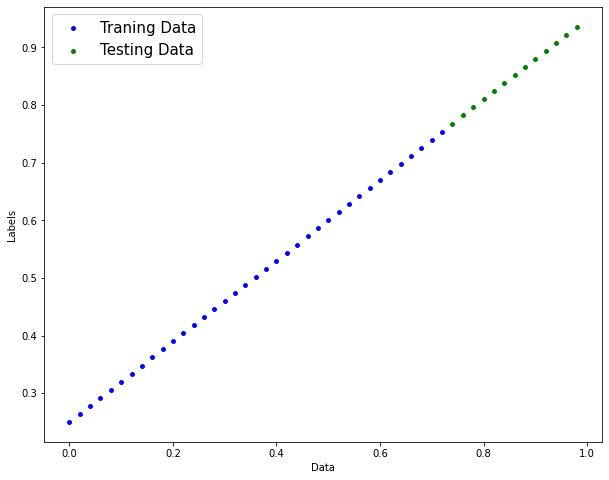

In [ ]:
plot_pridiction()

 ## Building model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

## checking model

In [ ]:
# set rondom seed
torch.manual_seed(64)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.8159], requires_grad=True), Parameter containing:
 tensor([0.6431], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.8159])), ('bias', tensor([0.6431]))])

## Making prediction using

In [ ]:
y_pred = model_0(x_test)
y_pred

tensor([[ 0.0393],
        [ 0.0229],
        [ 0.0066],
        [-0.0097],
        [-0.0260],
        [-0.0423],
        [-0.0586],
        [-0.0750],
        [-0.0913],
        [-0.1076],
        [-0.1239],
        [-0.1402],
        [-0.1566]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
  y_pred = model_0(x_test)

# also do someting similar with torch.no_grad():
# with torch.no_grad():
#   y_pred = model_0(x_test) 

y_pred

tensor([[ 0.0393],
        [ 0.0229],
        [ 0.0066],
        [-0.0097],
        [-0.0260],
        [-0.0423],
        [-0.0586],
        [-0.0750],
        [-0.0913],
        [-0.1076],
        [-0.1239],
        [-0.1402],
        [-0.1566]])

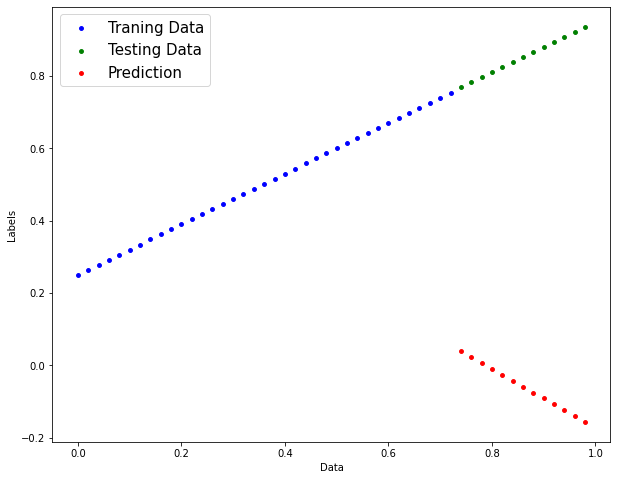

In [ ]:
plot_pridiction(prediction = y_pred)

## training model with pytorch
### loss function and optimizer

In [ ]:
loss_fn = nn.L1Loss()

optim_fn = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
epochs = 1000

### Training
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Train model
  model_0.train()

  # 1. forward step
  y_pred = model_0(x_train)

  # 2. calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer grad zero
  optim_fn.zero_grad()

  # 4. perform backward
  loss.backward()

  # 5.step the optimizer (gradient decent)
  optim_fn.step()

  model_0.eval() #turn off grandient tracking

  with torch.inference_mode():

    # Testing

    # 1. forward pass
    test_pred = model_0(x_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss} ")
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)



    print(model_0.state_dict())

Epoch: 0 | Loss: 0.3010510802268982 | test_loss: 0.9053009748458862 
OrderedDict([('weight', tensor([-0.8132])), ('bias', tensor([0.6460]))])
Epoch: 10 | Loss: 0.28810837864875793 | test_loss: 0.8591479063034058 
OrderedDict([('weight', tensor([-0.7872])), ('bias', tensor([0.6698]))])
Epoch: 20 | Loss: 0.2784534990787506 | test_loss: 0.8190307021141052 
OrderedDict([('weight', tensor([-0.7625])), ('bias', tensor([0.6887]))])
Epoch: 30 | Loss: 0.27096107602119446 | test_loss: 0.7850339412689209 
OrderedDict([('weight', tensor([-0.7393])), ('bias', tensor([0.7028]))])
Epoch: 40 | Loss: 0.2648305594921112 | test_loss: 0.7558527588844299 
OrderedDict([('weight', tensor([-0.7174])), ('bias', tensor([0.7131]))])
Epoch: 50 | Loss: 0.2596374452114105 | test_loss: 0.7294291853904724 
OrderedDict([('weight', tensor([-0.6961])), ('bias', tensor([0.7212]))])
Epoch: 60 | Loss: 0.2553049921989441 | test_loss: 0.7078955769538879 
OrderedDict([('weight', tensor([-0.6760])), ('bias', tensor([0.7255]))]

In [ ]:
# model_0.state_dict(), loss

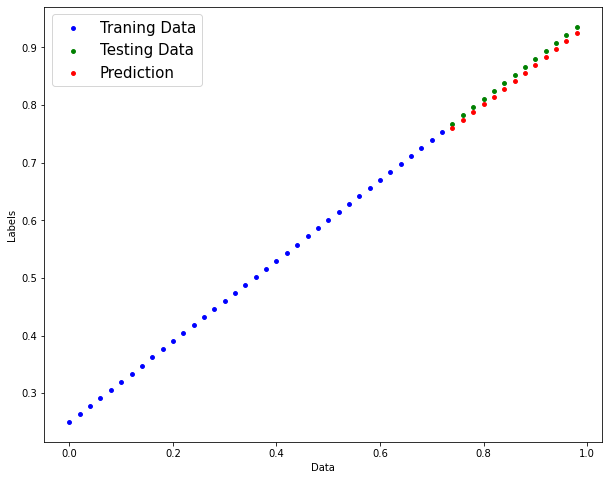

In [ ]:
plot_pridiction(prediction = test_pred)

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6900])), ('bias', tensor([0.2490]))])

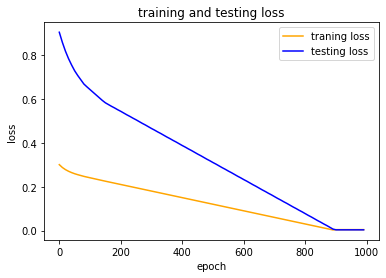

In [ ]:
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).cpu().numpy()), c='orange', label = "traning loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values).cpu().numpy()), c='blue', label = "testing loss")
plt.title("training and testing loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Saving model in pytorch

In [ ]:
from pathlib import Path

#  1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
MODEL_NAME = '01_Regresiion_with_pytorch_v1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving model
print(f"Save model at: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Save model at: models/01_Regresiion_with _pytorch.pth


In [ ]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jan  2 15:01 '01_Regresiion_with _pytorch.pth'


## Load saved model

In [ ]:
#  To Lode modle we create new instance of model
model_load_0 = LinearRegressionModel()

In [ ]:
model_load_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH, map_location = 'cpu'))

<All keys matched successfully>

In [ ]:
model_load_0.state_dict()

OrderedDict([('weight', tensor([0.6900])), ('bias', tensor([0.2490]))])

In [ ]:
# Make some prediction
model_load_0.eval()

with torch.inference_mode():
  load_pred = model_load_0(x_test)

load_pred

tensor([[0.7597],
        [0.7735],
        [0.7873],
        [0.8011],
        [0.8149],
        [0.8287],
        [0.8425],
        [0.8563],
        [0.8701],
        [0.8839],
        [0.8977],
        [0.9115],
        [0.9253]])

In [ ]:
load_pred == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [214]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [215]:
# Data
weight = 0.65
bais = 0.2

start = 0
end = 1
step = 0.002

X = torch.arange(start, end, step)
Y = weight*X + bais

X[:10], Y[:10]

(tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080, 0.0100, 0.0120, 0.0140, 0.0160,
         0.0180]),
 tensor([0.2000, 0.2013, 0.2026, 0.2039, 0.2052, 0.2065, 0.2078, 0.2091, 0.2104,
         0.2117]))

In [216]:
# device 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [217]:
# train test split
train_split = int(0.75 * len(X))
x_train, y_train = X[:train_split], Y[:train_split]
x_test, y_test = X[train_split:], Y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(375, 375, 125, 125)

In [218]:
# x_train = x_train.to(device)
# y_train = y_train.to(device)
# x_test = x_test.to(device)
# y_test = y_test.to(device)
x_train.unsqueeze(0).t().shape

torch.Size([375, 1])

In [219]:
# visulization
def plot_prdiction(x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, prediction = None):
  plt.figure(figsize = (10,8))
  plt.scatter(x_train, y_train, c='b', s=5, label="Training Data")
  plt.scatter(x_test, y_test, c='g', s=5, label="Testing Data")

  if prediction is not None:
    plt.scatter(x_test, prediction, c='r', s=5, label="Prediction Data")

 
  plt.title("trining and Testing Data")
  plt.xlabel("Data")
  plt.ylabel("Label")
  plt.legend(prop = {"size" : 15})
  plt.show()

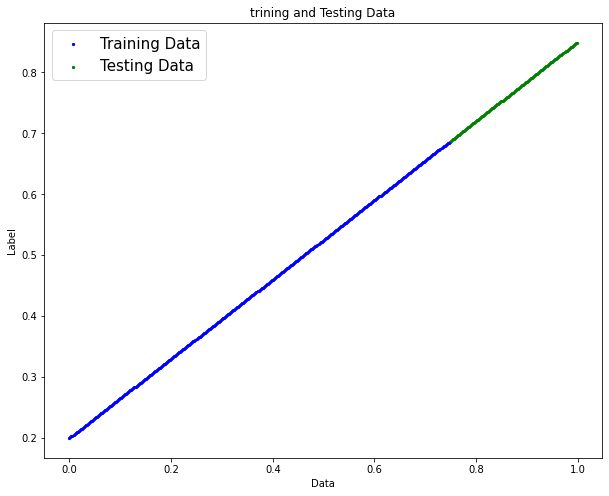

In [220]:
plot_prdiction()

In [270]:
# Building model

class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [271]:
# check device
next(model_1.parameters()).device

device(type='cpu')

In [272]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [273]:
# training loop
epoches = 300

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.008)

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

epoche_value = []
loss_values = []
test_loss_values = []

In [274]:
torch.manual_seed(42)
for epoch in range(0,epoches):
  # training
  model_1.train()

  # 1. Forward Step
  y_pred = model_1(x_train.unsqueeze(0).t())

  # 2.Loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimize zero grad
  optimizer.zero_grad()

  # 4. Backward Step
  loss.backward()

  # 5. optimizer
  optimizer.step()


  # testing
  model_1.eval()
  # 1. Forward pass
  with torch.inference_mode():
    test_pred = model_1(x_test.unsqueeze(0).t())

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  epoche_value.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([375])) that is different to the input size (torch.Size([375, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([125])) that is different to the input size (torch.Size([125, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.6728453040122986 | Test loss: 0.7194996476173401
Epoch: 100 | Loss: 0.15003113448619843 | Test loss: 0.0562579520046711
Epoch: 200 | Loss: 0.14056558907032013 | Test loss: 0.111709825694561


In [275]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3844]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2932], device='cuda:0'))])

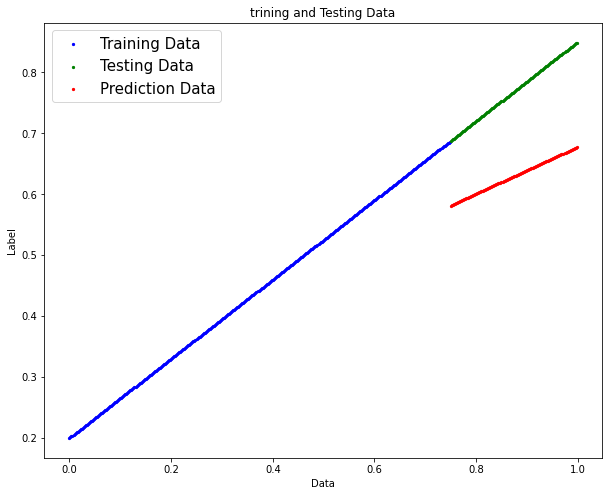

In [276]:
plot_prdiction(prediction = test_pred.cpu())

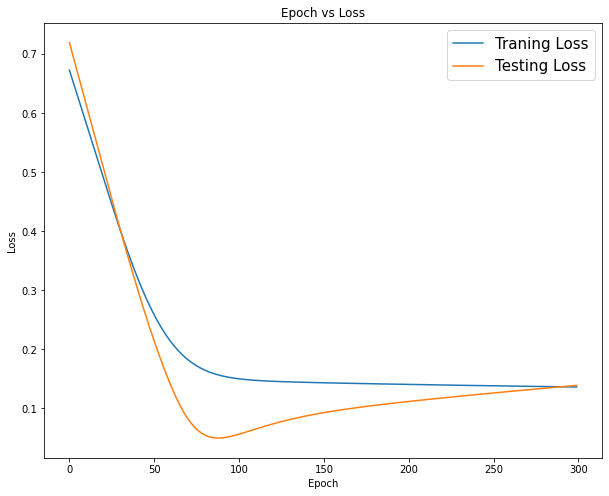

In [277]:
# epoch ve loss graph
# np.array(torch.tensor(test_loss_values).cpu().numpy()
plt.figure(figsize = (10,8))
plt.plot(epoche_value, np.array(torch.tensor(loss_values).cpu().numpy()), label="Traning Loss")
plt.plot(epoche_value, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Testing Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(prop = {"size" : 15})
plt.show()

In [280]:
# saving model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_Regression_with_Pytorch_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"model saving to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

model saving to : models/01_Regression_with_Pytorch_v2.pth


In [287]:
# load model
load_model_v2 = LinearRegressionV2()

load_model_v2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

load_model_v2.state_dict(), next(load_model_v2.parameters()).device

(OrderedDict([('linear_layer.weight', tensor([[0.3844]])),
              ('linear_layer.bias', tensor([0.2932]))]),
 device(type='cpu'))

In [288]:
load_model_v2.to(device)
next(load_model_v2.parameters()).device

device(type='cuda', index=0)

In [290]:
# model testing
with torch.inference_mode():
  load_pred = load_model_v2(x_test.unsqueeze(0).t())

load_pred == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        